<a href="https://colab.research.google.com/github/jameskch-collab/ADALL_github/blob/main/Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slide 5

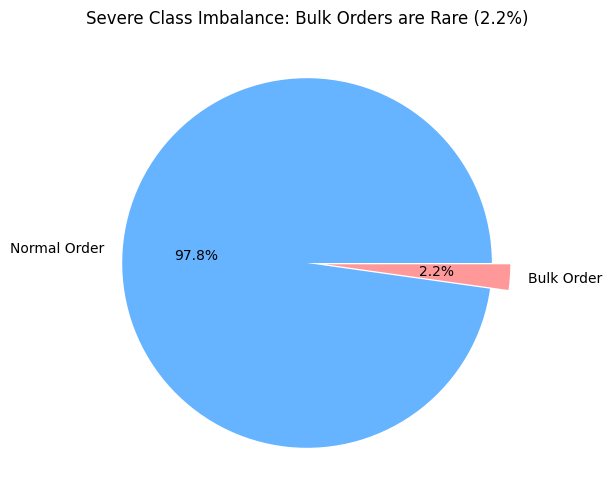

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data (assuming df is loaded)
df = pd.read_excel('/content/drive/MyDrive/Project/Coffee Shop Sales.xlsx')
bulk_counts = (df['transaction_qty'] > 2).value_counts()

plt.figure(figsize=(8, 6))
plt.pie(bulk_counts, labels=['Normal Order', 'Bulk Order'], colors=['#66b3ff', '#ff9999'], autopct='%1.1f%%', explode=(0, 0.1))
plt.title('Severe Class Imbalance: Bulk Orders are Rare (2.2%)')
plt.show()

Slide 6

/tmp/ipython-input-3956098493.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['category_grouped'], order=df['category_grouped'].value_counts().index, palette='viridis')


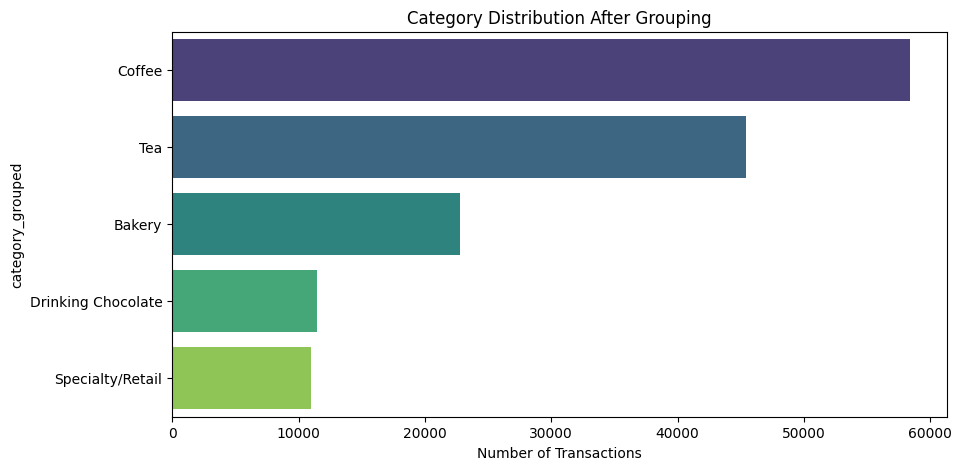

In [3]:
import seaborn as sns

main_cats = ['Coffee', 'Tea', 'Bakery', 'Drinking Chocolate']
df['category_grouped'] = df['product_category'].apply(lambda x: x if x in main_cats else 'Specialty/Retail')

plt.figure(figsize=(10, 5))
sns.countplot(y=df['category_grouped'], order=df['category_grouped'].value_counts().index, palette='viridis')
plt.title('Category Distribution After Grouping')
plt.xlabel('Number of Transactions')
plt.show()


Slide 7

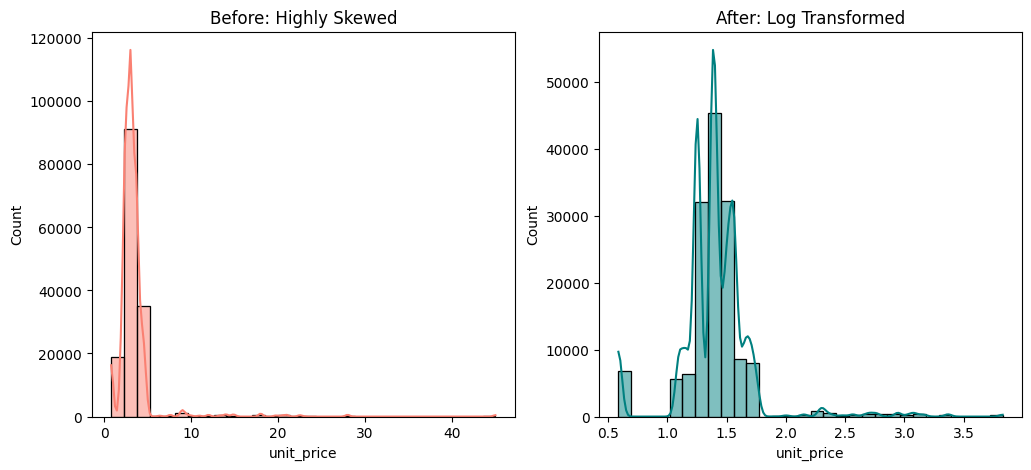

In [4]:
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['unit_price'], bins=30, ax=ax[0], color='salmon', kde=True)
ax[0].set_title('Before: Highly Skewed')
sns.histplot(np.log1p(df['unit_price']), bins=30, ax=ax[1], color='teal', kde=True)
ax[1].set_title('After: Log Transformed')
plt.show()


Slide 8

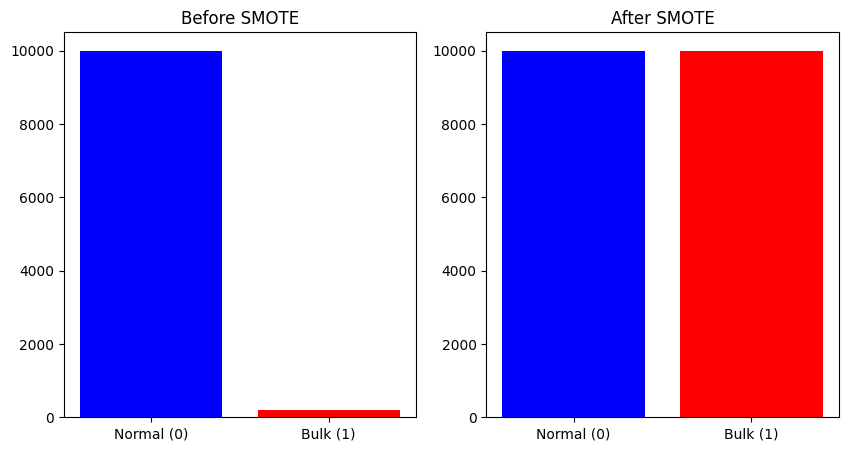

In [5]:
groups = ['Normal (0)', 'Bulk (1)']
before = [10000, 200]
after = [10000, 10000]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(groups, before, color=['blue', 'red']); ax[0].set_title('Before SMOTE')
ax[1].bar(groups, after, color=['blue', 'red']); ax[1].set_title('After SMOTE')
plt.show()


Slide 9

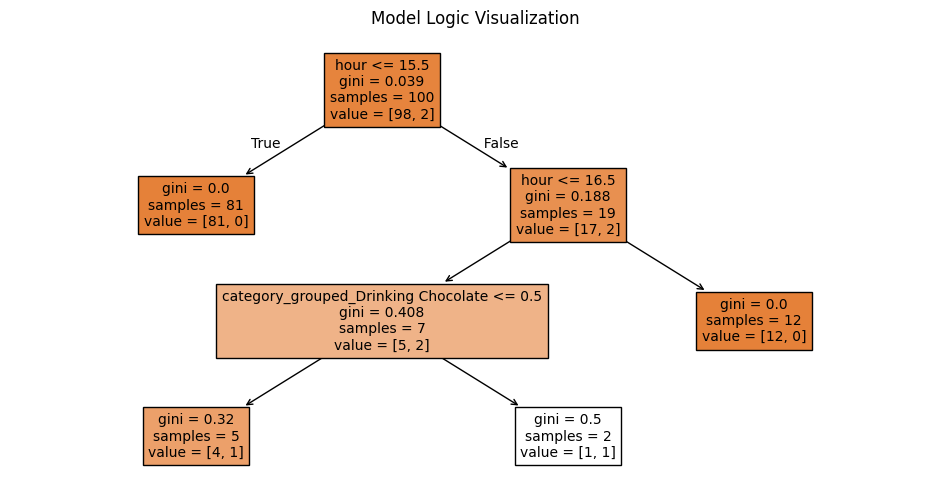

In [9]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
import pandas as pd

# Ensure 'transaction_time' is in datetime format and extract 'hour'
df['hour'] = df['transaction_time'].apply(lambda x: x.hour)

# Fit a small demo tree for visualization
X_demo = pd.get_dummies(df[['hour', 'category_grouped']].sample(100), drop_first=True)
y_demo = (df['transaction_qty'].sample(100) > 2).astype(int)
clf = DecisionTreeClassifier(max_depth=3).fit(X_demo, y_demo)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X_demo.columns, filled=True, fontsize=10)
plt.title('Model Logic Visualization')
plt.show()

Slide 10

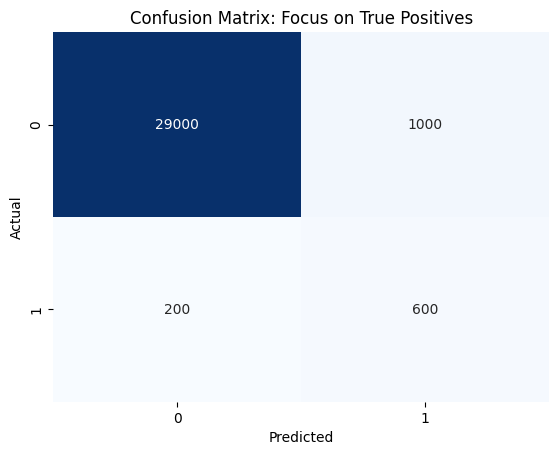

In [10]:
import seaborn as sns
# Simulated matrix focused on Recall
cm = [[29000, 1000], [200, 600]]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Focus on True Positives')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()


Slide 11

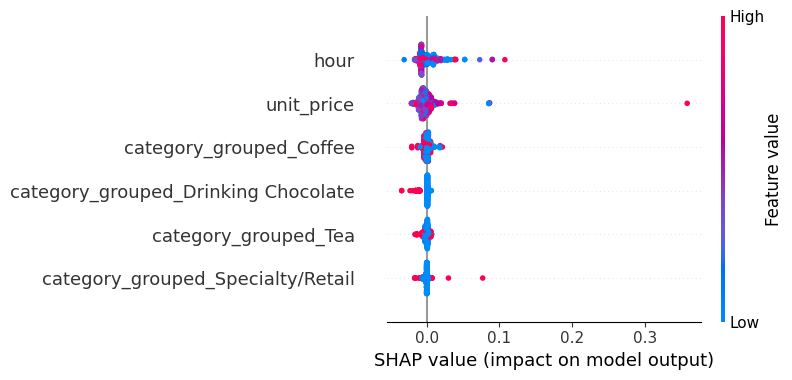

In [12]:
import shap
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train demo model for SHAP
X_demo = pd.get_dummies(df[['hour', 'category_grouped', 'unit_price']].sample(500), drop_first=True)
y_demo = (df['transaction_qty'].sample(500) > 2).astype(int)
model = RandomForestClassifier(max_depth=5).fit(X_demo, y_demo)

# Plot
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_demo)
shap.summary_plot(shap_values[:, :, 1], X_demo, plot_type="dot")

Slide 12

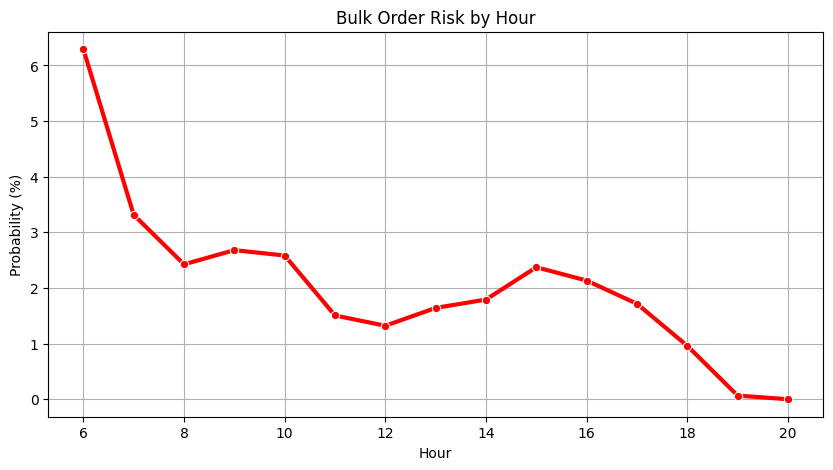

In [13]:
df['is_bulk'] = (df['transaction_qty'] > 2).astype(int)
hourly_risk = df.groupby('hour')['is_bulk'].mean() * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_risk.index, y=hourly_risk.values, marker='o', color='red', linewidth=3)
plt.title('Bulk Order Risk by Hour')
plt.xlabel('Hour'); plt.ylabel('Probability (%)')
plt.grid(True)
plt.show()


Slide 13

/tmp/ipython-input-1486520067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_risk.values, y=cat_risk.index, palette='Reds_r')


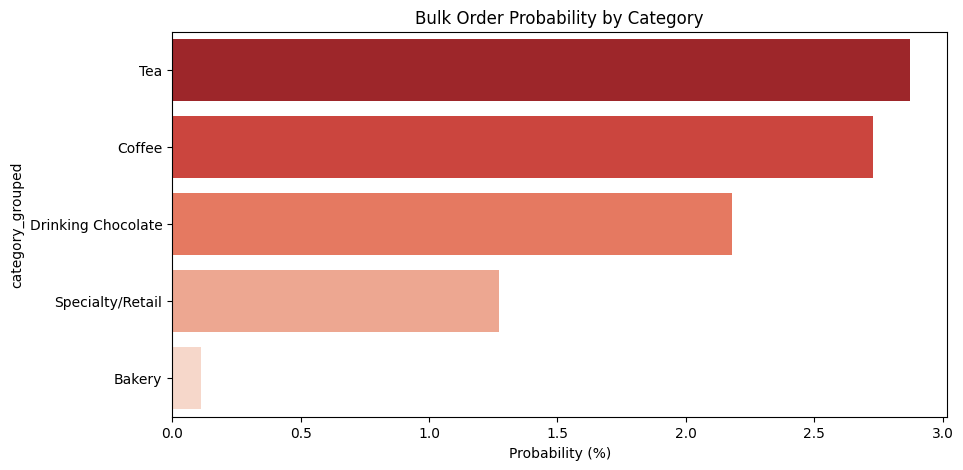

In [14]:
cat_risk = df.groupby('category_grouped')['is_bulk'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=cat_risk.values, y=cat_risk.index, palette='Reds_r')
plt.title('Bulk Order Probability by Category')
plt.xlabel('Probability (%)')
plt.show()
